In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('../data/train_V2.csv')
# target 1 row null data drop
test_df = pd.read_csv('../data/test_V2.csv')
df = df.dropna()

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
len(df)

4446965

In [6]:
# 총 3가지 종류 tpp, fpp, 케주얼모드
# fpp 1인칭 모드 tpp 3인칭 모드
# normal 일반모드
# ['duo','squad','solo','normal-duo','normal-squad','normal-solo'] 일반적인 게임 플레이 환경 데이터
# 'squad-fpp', 'solo-fpp, 'duo-fpp', 'normal-squad-fpp', 'normal-solo-fpp', 'normal-duo-fpp'
# flaretpp, flarefpp, crashfpp, crashtpp 이벤트 모드일 것이라 추측
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [7]:
# 캐주얼 모들 drop
df= df[~(df['matchType'] =='flaretpp')&
   ~(df['matchType'] =='flarefpp')&
   ~(df['matchType'] =='crashfpp')&
   ~(df['matchType'] =='crashtpp')]

In [8]:
print('캐주얼 모드 drop 수:',4446965 - len(df))

캐주얼 모드 drop 수: 9881


In [8]:
# fpp 모드 데이터 분포 수
df_1= df[(df['matchType'] =='squad-fpp')|
   (df['matchType'] =='solo-fpp')|
   (df['matchType'] =='duo-fpp')|
   (df['matchType'] =='normal-squad-fpp')|
   (df['matchType'] =='normal-solo-fpp')|
   (df['matchType'] =='normal-duo-fpp')]

In [9]:
# tpp 모드 데이터 분포 수
df_2= df[(df['matchType'] =='duo')|
   (df['matchType'] =='squad')|
   (df['matchType'] =='solo')|
   (df['matchType'] =='normal-duo')|
   (df['matchType'] =='normal-squad')|
   (df['matchType'] =='normal-solo')]

In [10]:
# 1인칭 모드 fpp
print('ffp 1인칭', len(df_1))
print('tpp 3인칭',len(df_2))

ffp 1인칭 3313983
tpp 3인칭 1123101


In [11]:
print('TPP 모드 데이터 수:', len(df_2))
# print(f'데이터 전처리 수  : {4446965 - len(df_2)}')

TPP 모드 데이터 수: 1123101


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4437084 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

<AxesSubplot:>

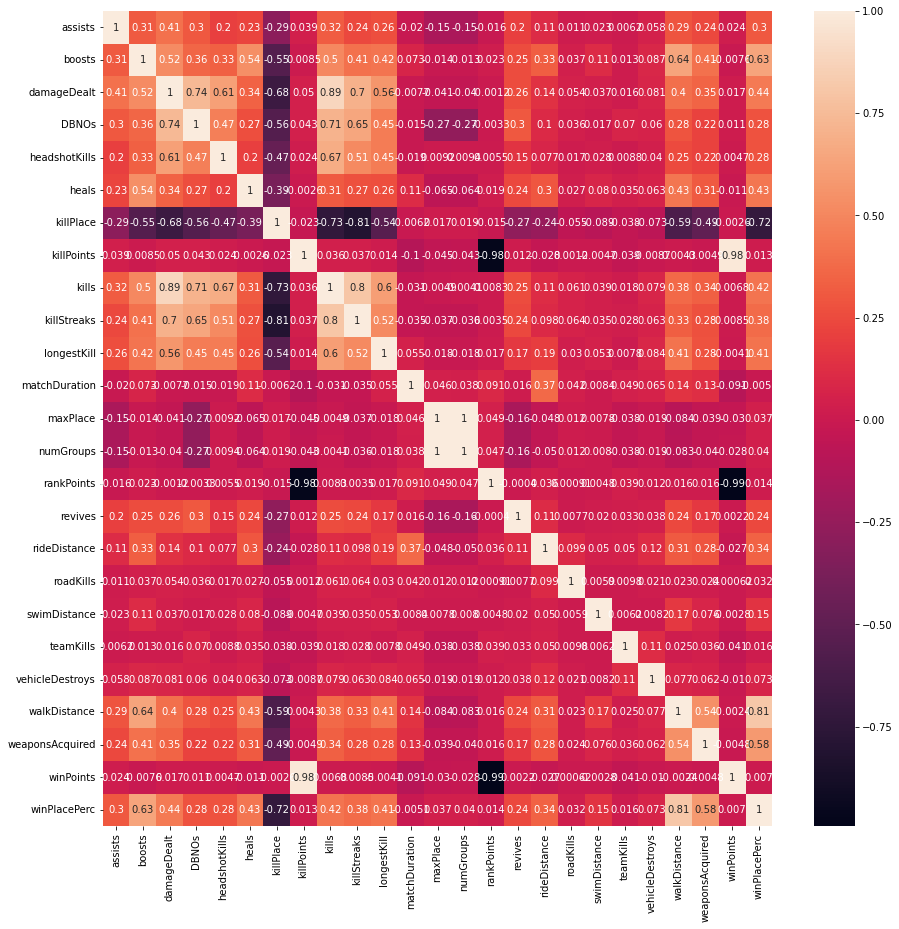

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

# Train Test data 비교

In [24]:
# 전체 train 데이터에서 비중
matchId_drop = df['matchId'].value_counts().loc[df['matchId'].value_counts()<60].index
len(df.loc[df['matchId'].isin(matchId_drop)])/len(df)*100

0.7845693252595624

In [25]:
# 전체 test데이터에서 비중
matchId_drop = test_df['matchId'].value_counts().loc[test_df['matchId'].value_counts()<60].index
len(test_df.loc[test_df['matchId'].isin(matchId_drop)])/len(test_df)*100

0.32670276821009897

In [26]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [34]:
# df.groupby(['matchId','groupId']).col.transform('count')
a = df.groupby(['matchId', 'groupId']).count()

In [42]:
a.head()

Id  assists  boosts  damageDealt  DBNOs  \
matchId        groupId                                                   
0000a43bce5eec 18b16ec699d8b6   2        2       2            2      2   
               236ab9e9c081b9   6        6       6            6      6   
               3a6addfa0df938   2        2       2            2      2   
               4bf06994bd4c9a   2        2       2            2      2   
               4d1bbbc19b9084   2        2       2            2      2   

                               headshotKills  heals  killPlace  killPoints  \
matchId        groupId                                                       
0000a43bce5eec 18b16ec699d8b6              2      2          2           2   
               236ab9e9c081b9              6      6          6           6   
               3a6addfa0df938              2      2          2           2   
               4bf06994bd4c9a              2      2          2           2   
               4d1bbbc19b9084              2      2          2           2   

                               kills  killStreaks  longestKill  matchDuration  \
matchId        groupId                                                          
0000a43bce5eec 18b16ec699d8b6      2            2            2              2   
               236ab9e9c081b9      6            6            6              6   
               3a6addfa0df938      2            2            2              2   
               4bf06994bd4c9a      2            2            2              2   
               4d1bbbc19b9084      2            2            2              2   

                               matchType  maxPlace  numGroups  rankPoints  \
matchId        groupId                                                      
0000a43bce5eec 18b16ec699d8b6          2         2          2           2   
               236ab9e9c081b9          6         6          6           6   
               3a6addfa0df938          2         2          2           2   
               4bf06994bd4c9a          2         2          2           2   
               4d1bbbc19b9084          2         2          2           2   

                               revives  rideDistance  roadKills  swimDistance  \
matchId        groupId                                                          
0000a43bce5eec 18b16ec699d8b6        2             2          2             2   
               236ab9e9c081b9        6             6          6             6   
               3a6addfa0df938        2             2          2             2   
               4bf06994bd4c9a        2             2          2             2   
               4d1bbbc19b9084        2             2          2             2   

                               teamKills  vehicleDestroys  walkDistance  \
matchId        groupId                                                    
0000a43bce5eec 18b16ec699d8b6          2                2             2   
               236ab9e9c081b9          6                6             6   
               3a6addfa0df938          2                2             2   
               4bf06994bd4c9a          2                2             2   
               4d1bbbc19b9084          2                2             2   

                               weaponsAcquired  winPoints  winPlacePerc  
matchId        groupId                                                   
0000a43bce5eec 18b16ec699d8b6                2          2             2  
               236ab9e9c081b9                6          6             6  
               3a6addfa0df938                2          2             2  
               4bf06994bd4c9a                2          2             2  
               4d1bbbc19b9084                2          2             2

In [48]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# EDA 전처리

In [16]:
# winplaceperc 상관관계가 높은 컬럼
# walkdistance 0.81
# weaponsacquired 0.58
# killplace -0.72
# kills 0.42
# heals 0.43
# boosts 0.63
# dabagedealt 0.44

In [17]:
# killplace
# 1. 전체죽인사람의 수를 순위를 매긴다

# 가설: solo모드에서 사용하지 못하는 컬럼에 대해서 전처리하는 것이 성능에 좋을 것이다.

df.nunique()

Id                 4437084
groupId            2022539
matchId              47848
assists                 20
boosts                  27
damageDealt          29910
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28262
matchDuration         1243
matchType               12
maxPlace                99
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33501
roadKills               14
swimDistance         28339
teamKills               11
vehicleDestroys          6
walkDistance         38591
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

In [4]:
# 간단한 전처리 후 모델 돌려보기(linear, moltinomial, xgboost)
df.head()
# Id,groupId, matchId: drop
# matchType: one hot
# standardscaler 이용하여 scaling하기

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df = df.drop(columns=['Id','groupId','matchId','matchType','killPlace'])

In [6]:
# d = pd.get_dummies(df_1.matchType, prefix='matchType')
# df_1 = pd.concat([df_1,d],axis=1)
# df_1 = df_1.drop(columns='matchType')
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
y = df[['winPlacePerc']]
X = df.drop(columns='winPlacePerc')

In [8]:
display(y)
display(X)

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446961,0.1786
4446962,0.2935
4446963,0.4815
4446964,0.8000


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0
3,0,0,32.90,0,0,0,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0
4,0,0,100.00,0,0,0,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507
4446962,0,1,44.15,0,0,0,0,0,0,0.00,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0
4446963,0,0,59.06,0,0,0,0,0,0,0.00,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0
4446964,0,4,180.40,1,1,2,0,2,1,98.50,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error

# scaler = StandardScaler()
# # scaler = MinMaxScaler()
# # scaler = RobustScaler()
# X = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3557572, 23), (3557572, 1), (889393, 23), (889393, 1))

In [14]:
# lindearregression 단순히 해보기
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [15]:
pred = np.round(model.predict(X_valid))
mae = mean_absolute_error(y_valid, pred)
print(format(mae,'.5f'))

0.25062


In [26]:
# # random forest
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=42, criterion='absolute_error').fit(X_train, y_train)
# pred = rf.predict(X_valid)
# mae = mean_absolute_error(y_valid, pred)
# print(format(mae,'.5f'))

In [13]:
# xgboost
# 시간 오래 걸립니다...
import xgboost
from xgboost import cv

xgb_model = xgboost.XGBRegressor(
    eval_metric=mean_absolute_error
    ,random_state=42)

xgb_model.fit(X_train,y_train)

pred = xgb_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print(format(mae,'.5f'))

0.09016


In [10]:
import xgboost
from xgboost import cv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
xgbr = xgboost.XGBRegressor(eval_metric='mae',
                            booster='gbtree',
                            gamma=0,
                            importance_type='gain',
                            learning_rate=0.05,
                            max_depth=5,
                            min_child_weight=1,
                            n_estimators=100,
                            n_jobs=-1,
                            objective='reg:squaredlogerror',
                            random_state=42,
                            reg_alpha=0)

kfold = KFold(n_splits=5)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[09:24:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[09:25:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[09:26:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprec

In [12]:
kf_cv_scores

array([0.82472418, 0.82513392, 0.82526348, 0.82552688, 0.82473629])

In [28]:
# 1. eda, 전처리
# 2. 모델링(모델 선택 regression, polyno, xgboost, bagging model)
# 3. 모델 하이퍼파라미터 튜닝
# 4. workflow 만든다